<a href="https://www.kaggle.com/code/biocanter/top-30-with-stacked-ensemble-methods?scriptVersionId=99682059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
####impport data
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test1 = "../input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(test1, index_col='Id')

In [3]:
###if we check the categorical data we can realize some categorical data are actually numerical data
qual_dict = {"na": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train['']=train['ExterQual'].fillna("na")
train['ExterCond']=train['ExterCond'].fillna("na")
train['BsmtCond']=train['BsmtCond'].fillna("na")
train['BsmtQual']=train['BsmtQual'].fillna("na")
train['KitchenQual']=train['KitchenQual'].fillna("na")
train['GarageQual']=train['GarageQual'].fillna("na")
train['GarageCond']=train['GarageCond'].fillna("na")
train['FireplaceQu']=train['FireplaceQu'].fillna("na")
train['PoolQC']=train['PoolQC'].fillna("na")
train['HeatingQC']=train['HeatingQC'].fillna("na")

####
train["ExterQual"] = train["ExterQual"].map(qual_dict)
train["ExterCond"] = train["ExterCond"].map(qual_dict)
train["BsmtCond"] = train["BsmtCond"].map(qual_dict)
train["BsmtQual"] = train["BsmtQual"].map(qual_dict)
train["KitchenQual"] = train["KitchenQual"].map(qual_dict)
train["GarageQual"] = train["GarageQual"].map(qual_dict)
train["GarageCond"] = train["GarageCond"].map(qual_dict)
train["FireplaceQu"] = train["FireplaceQu"].map(qual_dict)
train["PoolQC"] = train["PoolQC"].map(qual_dict)
train["HeatingQC"] = train["HeatingQC"].map(qual_dict)

###BsmtExposure
train.loc[train.BsmtExposure=='No','BsmtExposure']=int(1)
train.loc[train.BsmtExposure=='Mn','BsmtExposure']=int(2)
train.loc[train.BsmtExposure=='Av','BsmtExposure']=int(3)
train.loc[train.BsmtExposure=='Gd','BsmtExposure']=int(4)
train['BsmtExposure']=train['BsmtExposure'].fillna(0)
train['BsmtExposure']=train['BsmtExposure'].astype(str).astype(int)

###GarageFinish
train.loc[train.GarageFinish=='Unf','GarageFinish']=int(1)
train.loc[train.GarageFinish=='RFn','GarageFinish']=int(2)
train.loc[train.GarageFinish=='Fin','GarageFinish']=int(3)
train['GarageFinish']=train['GarageFinish'].fillna(0)
train['GarageFinish']=train['GarageFinish'].astype(str).astype(int)

###PavedDrive
#train['PavedDrive']=train['PavedDrive'].fillna(0)
#train.loc[train.PavedDrive=='Y','PavedDrive']=int(1)
#train.loc[train.PavedDrive=='P','PavedDrive']=int(2)
#train.loc[train.PavedDrive=='N','PavedDrive']=int(3)
#train['PavedDrive']=train['PavedDrive'].astype(str).astype(int)

###boolean feature
#PoolQC
train.loc[train.PoolQC>0,'PoolQC']=int(1)
train.loc[train.PoolQC==0,'PoolQC']=int(0)
###MasVnrArea
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train.loc[train.MasVnrArea>0,'MasVnrArea']=int(1)
train.loc[train.MasVnrArea==0,'MasVnrArea']=int(0)
###WoodDeckSF
train.loc[train.WoodDeckSF>0,'WoodDeckSF']=int(1)
train.loc[train.WoodDeckSF==0,'WoodDeckSF']=int(0)
########
#OpenPorchSF,,,ScreenPorch
train.loc[train.OpenPorchSF>0,'OpenPorchSF']=int(1)
train.loc[train.OpenPorchSF==0,'OpenPorchSF']=int(0)
##
train.loc[train.EnclosedPorch>0,'EnclosedPorch']=int(1)
train.loc[train.EnclosedPorch==0,'EnclosedPorch']=int(0)
###
train = train.rename(columns={'3SsnPorch':'SsnPorch'})
train.loc[train.SsnPorch>0,'SsnPorch']=int(1)
train.loc[train.SsnPorch==0,'SsnPorch']=int(0)
####
train.loc[train.ScreenPorch>0,'ScreenPorch']=int(1)
train.loc[train.ScreenPorch==0,'ScreenPorch']=int(0)
###Street
train.loc[train.Street=='Pave','Street']=int(0)
train.loc[train.Street=='Grvl','Street']=int(1)
train['Street']=train['Street'].fillna(0)
train['Street']=train['Street'].astype(str).astype(int)
###CentralAir
train['CentralAir']=train['CentralAir'].fillna(0)
train.loc[train.CentralAir=='N','CentralAir']=int(0)
train.loc[train.CentralAir=='Y','CentralAir']=int(1)
train['CentralAir']=train['CentralAir'].astype(str).astype(int)
###Alley
train['Alley']=train['Alley'].fillna(0)
train.loc[train.Alley=='Pave','Alley']=int(1)
train.loc[train.Alley=='Grvl','Alley']=int(1)
train['Alley']=train['Alley'].astype(str).astype(int)

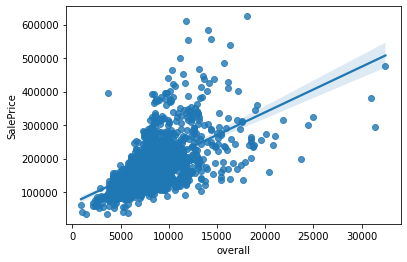

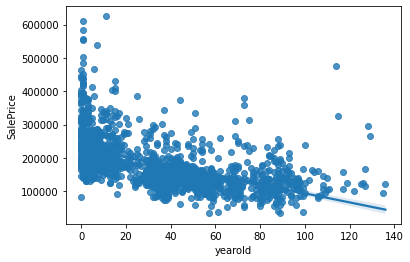

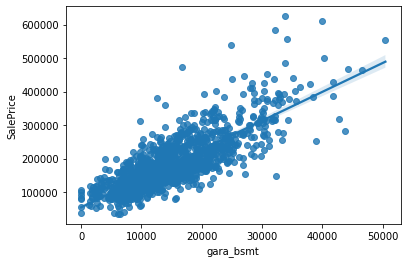

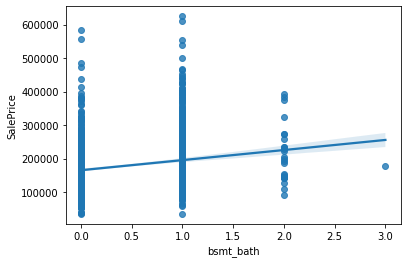

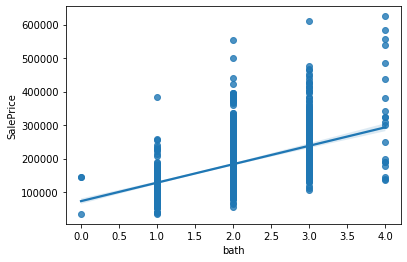

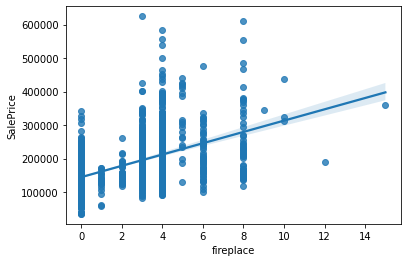

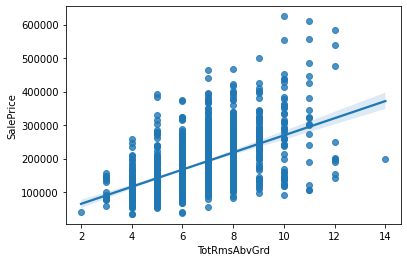

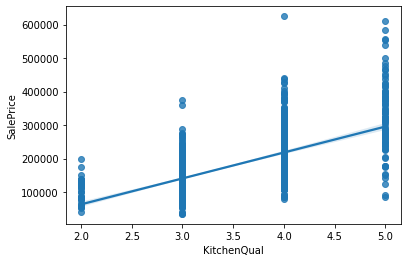

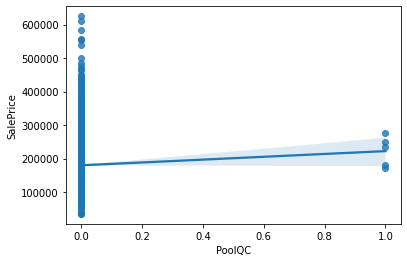

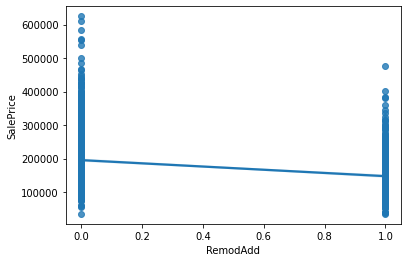

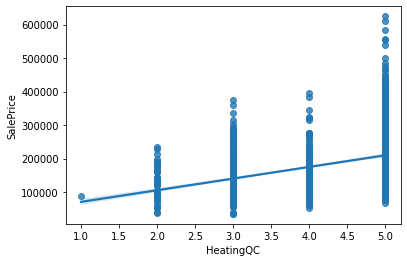

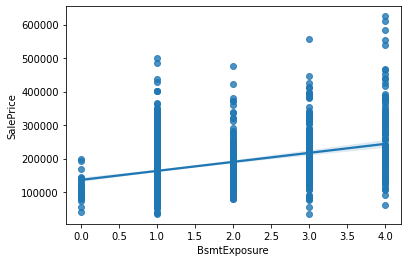

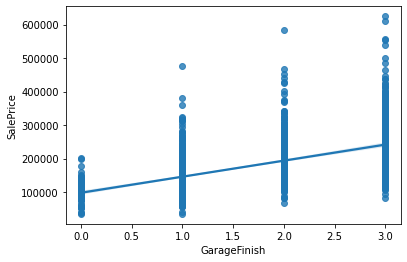

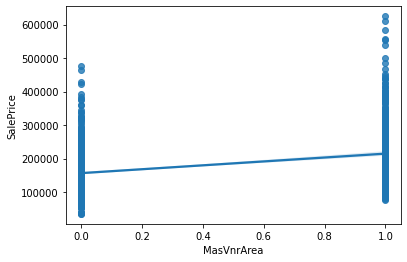

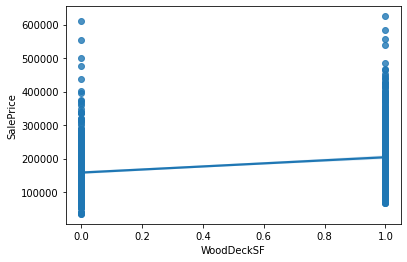

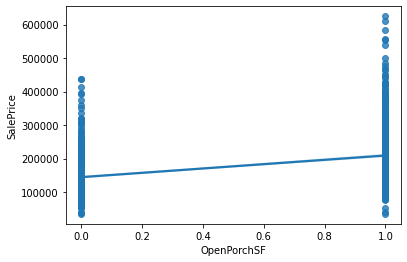

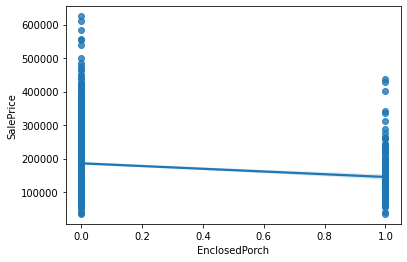

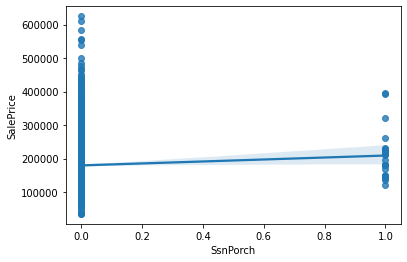

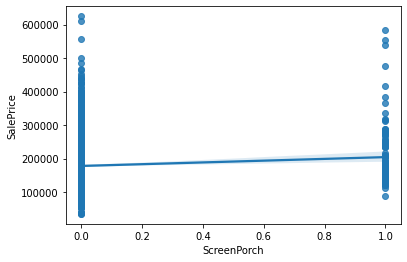

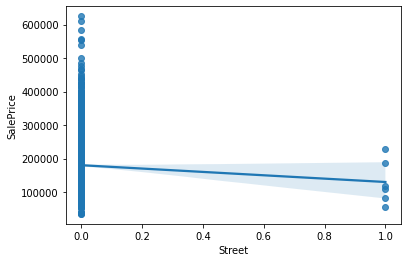

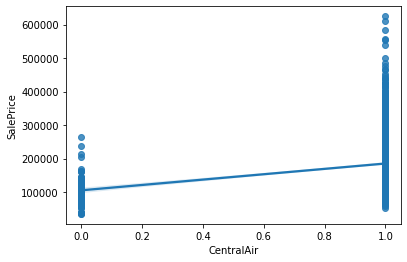

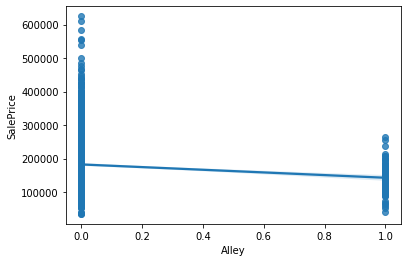

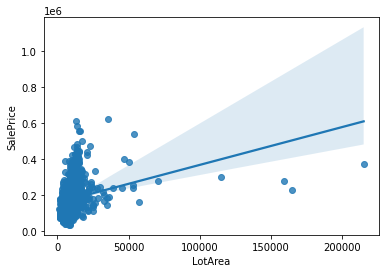

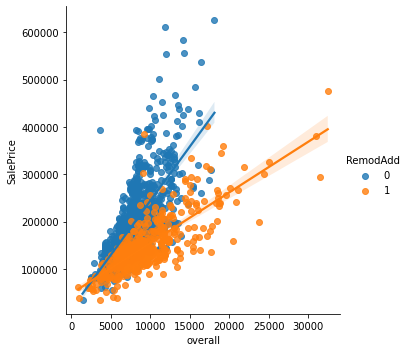

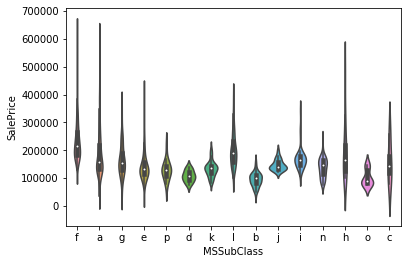

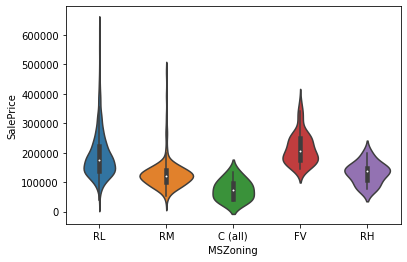

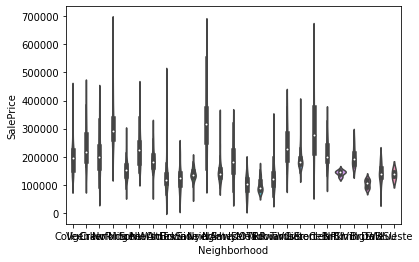

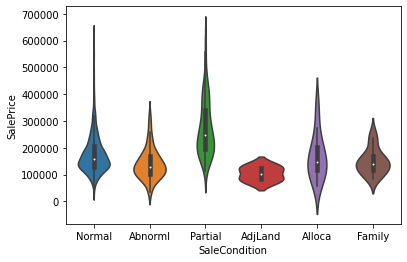

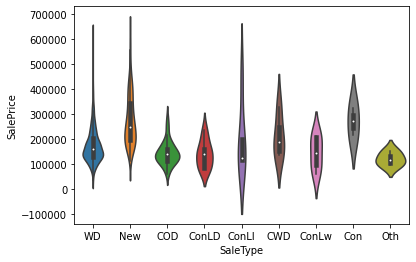

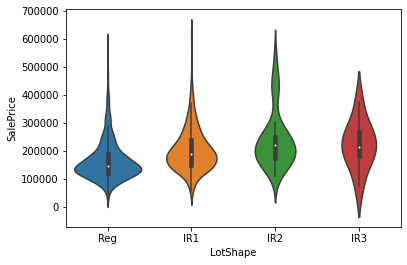

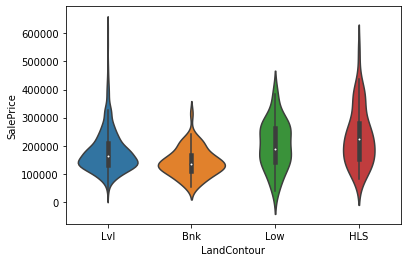

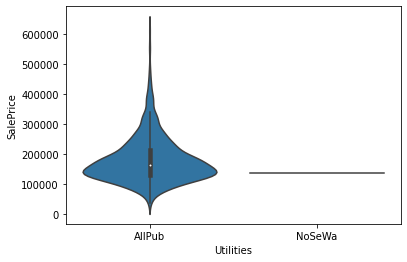

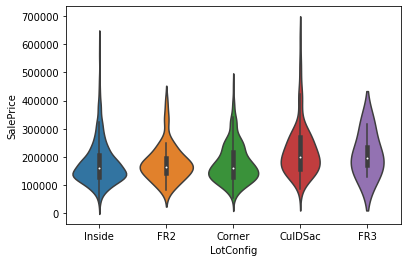

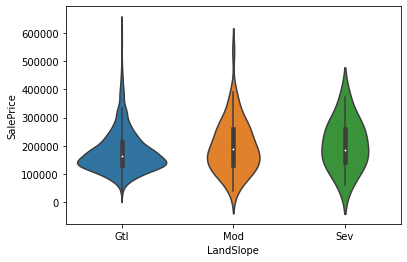

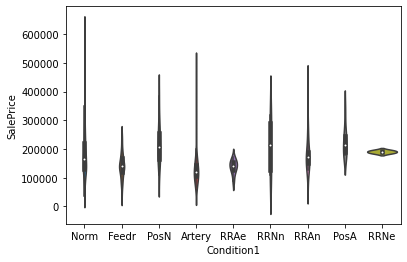

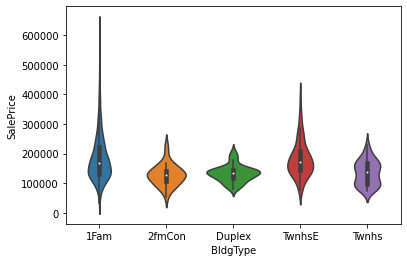

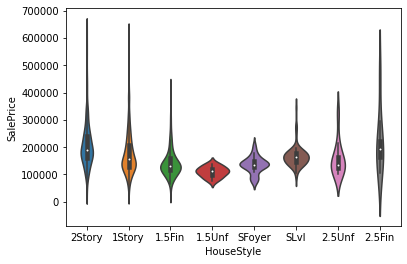

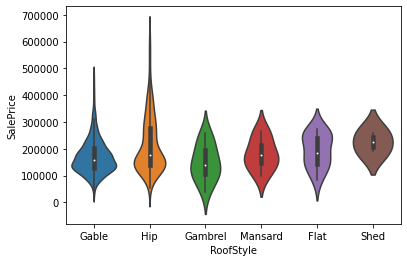

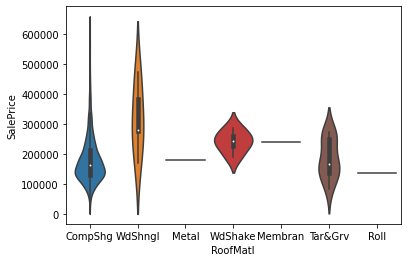

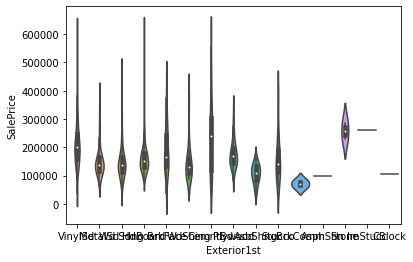

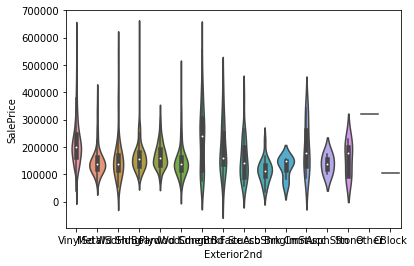

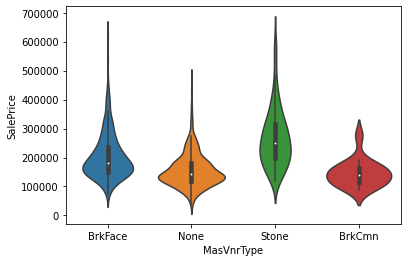

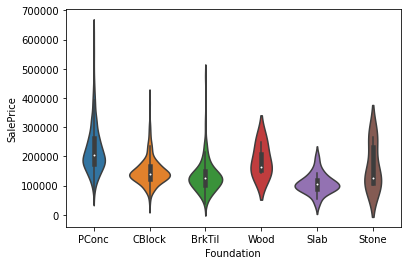

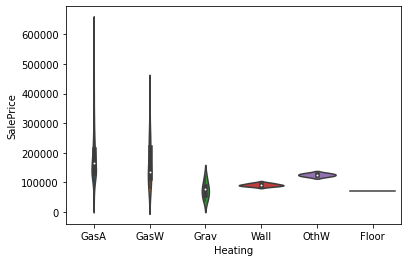

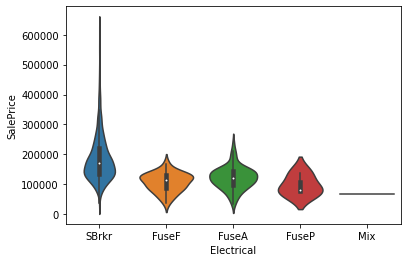

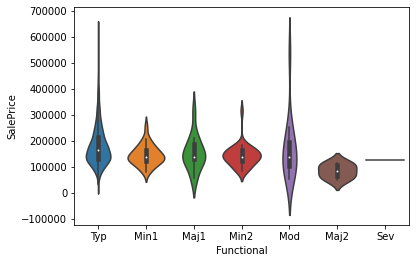

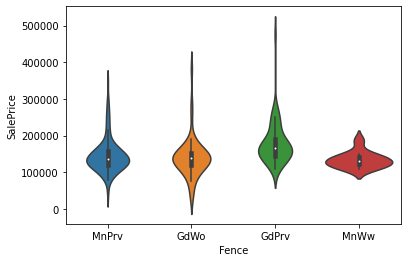

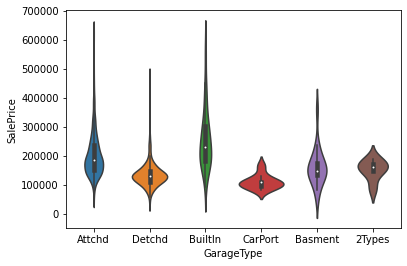

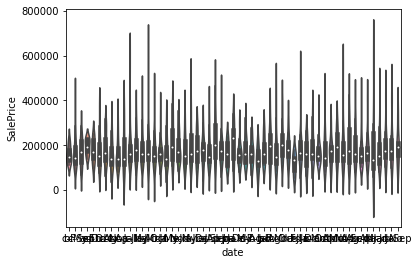

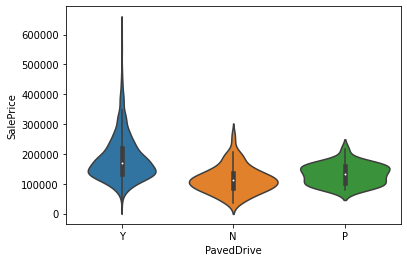

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew 
from scipy import stats
from scipy.special import boxcox1p
###Feature optimization & Engineering 
###removing outliers .- ref.- almost all the notebooks
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)
###create new features
train['overall']=train['GrLivArea']*train['OverallCond']
####when you want to buy a house, one of the most important features is the house year old
train['yearold'] = train['YrSold'] - train['YearBuilt']
####removed add yes or no
train['yearold_add'] = train['YrSold'] - train['YearRemodAdd']
train['yearold_add'] = train['yearold'] - train['yearold_add']
RemodAdd=[]
for h in range (0, len(train)):
    if train['yearold_add'][h]>2:
        RemodAdd.append(1)
    else:
        RemodAdd.append(0)
train['RemodAdd']=RemodAdd
### next two continuous features (bsmt and garage) have a lot of 0 and I don´t like 0.My intuiton tells me, alghoritm neither
train['bsmt']=train['BsmtQual']*train['TotalBsmtSF']*train['BsmtCond']
train['garage']=(train['GarageQual']+train['GarageCond'])*train['GarageArea']
###combine bsmt and garage in order to remove 0
train['gara_bsmt']=train['bsmt']+train['garage']
####if there is bsmtfullbath & bsmthalfbath it means the basement is in a good conditions
train['bsmt_bath']= train['BsmtFullBath']+train['BsmtHalfBath']
####
train['bath']= train['FullBath']+train['HalfBath']
###
train['fireplace'] = train['Fireplaces'] * train['FireplaceQu']

#### combine year and month sold, train['date'], numerical into categorical 
####
train.loc[train.YrSold==2006,'YrSold']=str("a")
train.loc[train.YrSold==2007,'YrSold']=str("b")
train.loc[train.YrSold==2008,'YrSold']=str("c")
train.loc[train.YrSold==2009,'YrSold']=str("d")
train.loc[train.YrSold==2010,'YrSold']=str("e")
####
train.loc[train.MoSold==1,'MoSold']=str("Ja")
train.loc[train.MoSold==2,'MoSold']=str("F")
train.loc[train.MoSold==3,'MoSold']=str("Mr")
train.loc[train.MoSold==4,'MoSold']=str("Ap")
train.loc[train.MoSold==5,'MoSold']=str("My")
train.loc[train.MoSold==6,'MoSold']=str("Jn")
train.loc[train.MoSold==7,'MoSold']=str("Jl")
train.loc[train.MoSold==8,'MoSold']=str("Ag")
train.loc[train.MoSold==9,'MoSold']=str("Sep")
train.loc[train.MoSold==10,'MoSold']=str("Oct")
train.loc[train.MoSold==11,'MoSold']=str("No")
train.loc[train.MoSold==12,'MoSold']=str("Dc")
###
train["date"] = train["YrSold"] + "-" + train["MoSold"]
###
#####MSSubClass to categorical data
train.loc[train.MSSubClass==20,'MSSubClass']=str("a")
train.loc[train.MSSubClass==30,'MSSubClass']=str("b")
train.loc[train.MSSubClass==40,'MSSubClass']=str("c")
train.loc[train.MSSubClass==45,'MSSubClass']=str("d")
train.loc[train.MSSubClass==50,'MSSubClass']=str("e")
train.loc[train.MSSubClass==60,'MSSubClass']=str("f")
train.loc[train.MSSubClass==70,'MSSubClass']=str("g")
train.loc[train.MSSubClass==75,'MSSubClass']=str("h")
train.loc[train.MSSubClass==80,'MSSubClass']=str("i")
train.loc[train.MSSubClass==85,'MSSubClass']=str("j")
train.loc[train.MSSubClass==90,'MSSubClass']=str("k")
train.loc[train.MSSubClass==120,'MSSubClass']=str("l")
train.loc[train.MSSubClass==150,'MSSubClass']=str("m")
train.loc[train.MSSubClass==160,'MSSubClass']=str("n")
train.loc[train.MSSubClass==180,'MSSubClass']=str("o")
train.loc[train.MSSubClass==190,'MSSubClass']=str("p")

###plot numerical features I want to use
numeric_feature=['overall','yearold','gara_bsmt','bsmt_bath','bath','fireplace','TotRmsAbvGrd','KitchenQual','PoolQC','RemodAdd','HeatingQC','BsmtExposure',
               'GarageFinish','MasVnrArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SsnPorch','ScreenPorch',
                'Street','CentralAir','Alley','LotArea']
for h in numeric_feature:
    sns.regplot(x = h, y = 'SalePrice' , data = train)
    plt.show()
###this plot shows the RemodAdd features can divide the overall data pretty well
sns.lmplot(x="overall", y="SalePrice", hue="RemodAdd", data=train);
plt.show()   
###plot categorical features I want to use
categoric_feature=['MSSubClass','MSZoning','Neighborhood','SaleCondition','SaleType','LotShape','LandContour',
      'Utilities','LotConfig','LandSlope','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl',
      'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional',
       'Fence','GarageType','date','PavedDrive']
for h in categoric_feature:
    sns.violinplot(x=h, y="SalePrice", data=train)
    plt.show() 

###I have also added TotRmsAbvGrd & KitchenQual


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


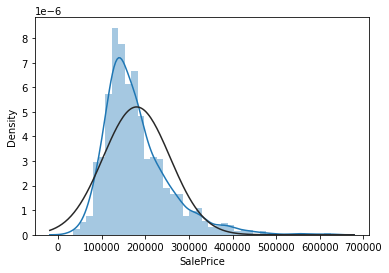

In [5]:
###Feature Engineering
##Log-transformation of skewed target variable
sns.distplot(train['SalePrice'], fit=norm);
plt.show()
train['SalePrice'] = np.log1p(train['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


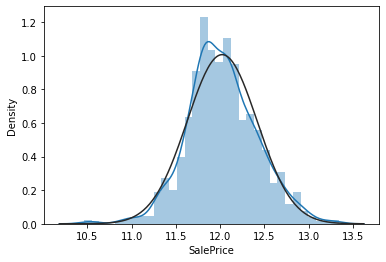

In [6]:
##now we can see our target variable with a normal distribution.
sns.distplot(train['SalePrice'], fit=norm);
plt.show()

In [7]:
###check train the data
####train misssing data
a=test.isna().sum()
b=test.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h])) 

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


In [8]:
###test data
test['ExterQual']=test['ExterQual'].fillna("na")
test['ExterCond']=test['ExterCond'].fillna("na")
test['BsmtCond']=test['BsmtCond'].fillna("na")
test['BsmtQual']=test['BsmtQual'].fillna("na")
test['KitchenQual']=test['KitchenQual'].fillna("na")
test['GarageQual']=test['GarageQual'].fillna("na")
test['GarageCond']=test['GarageCond'].fillna("na")
test['FireplaceQu']=test['FireplaceQu'].fillna("na")
test['PoolQC']=test['PoolQC'].fillna("na")
test['HeatingQC']=test['HeatingQC'].fillna("na")
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['BsmtCond']=test['BsmtCond'].fillna(0)
test['GarageArea']=test['GarageArea'].fillna(0)
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0)
####
test["ExterQual"] = test["ExterQual"].map(qual_dict)
test["ExterCond"] = test["ExterCond"].map(qual_dict)
test["BsmtCond"] = test["BsmtCond"].map(qual_dict)
test["BsmtQual"] = test["BsmtQual"].map(qual_dict)
test["KitchenQual"] = test["KitchenQual"].map(qual_dict)
test["GarageQual"] = test["GarageQual"].map(qual_dict)
test["GarageCond"] = test["GarageCond"].map(qual_dict)
test["FireplaceQu"] = test["FireplaceQu"].map(qual_dict)
test["PoolQC"] = test["PoolQC"].map(qual_dict)
test["HeatingQC"] = test["HeatingQC"].map(qual_dict)

###BsmtExposure
test.loc[test.BsmtExposure=='No','BsmtExposure']=int(1)
test.loc[test.BsmtExposure=='Mn','BsmtExposure']=int(2)
test.loc[test.BsmtExposure=='Av','BsmtExposure']=int(3)
test.loc[test.BsmtExposure=='Gd','BsmtExposure']=int(4)
test['BsmtExposure']=test['BsmtExposure'].fillna(0)
test['BsmtExposure']=test['BsmtExposure'].astype(str).astype(int)

###GarageFinish
test.loc[test.GarageFinish=='Unf','GarageFinish']=int(1)
test.loc[test.GarageFinish=='RFn','GarageFinish']=int(2)
test.loc[test.GarageFinish=='Fin','GarageFinish']=int(3)
test['GarageFinish']=test['GarageFinish'].fillna(0)
test['GarageFinish']=test['GarageFinish'].astype(str).astype(int)

###PavedDrive
#test['PavedDrive']=test['PavedDrive'].fillna(0)
#test.loc[test.PavedDrive=='Y','PavedDrive']=int(1)
#test.loc[test.PavedDrive=='P','PavedDrive']=int(2)
#test.loc[test.PavedDrive=='N','PavedDrive']=int(3)
#test['PavedDrive']=test['PavedDrive'].astype(str).astype(int)

###boolean feature
#PoolQC
test.loc[test.PoolQC>0,'PoolQC']=int(1)
test.loc[test.PoolQC==0,'PoolQC']=int(0)
###MasVnrArea
test['MasVnrArea']=test['MasVnrArea'].fillna(0)
test.loc[test.MasVnrArea>0,'MasVnrArea']=int(1)
test.loc[test.MasVnrArea==0,'MasVnrArea']=int(0)
###WoodDeckSF
test.loc[test.WoodDeckSF>0,'WoodDeckSF']=int(1)
test.loc[test.WoodDeckSF==0,'WoodDeckSF']=int(0)
########
#OpenPorchSF,,,ScreenPorch
test.loc[test.OpenPorchSF>0,'OpenPorchSF']=int(1)
test.loc[test.OpenPorchSF==0,'OpenPorchSF']=int(0)
##
test.loc[test.EnclosedPorch>0,'EnclosedPorch']=int(1)
test.loc[test.EnclosedPorch==0,'EnclosedPorch']=int(0)
###
test = test.rename(columns={'3SsnPorch':'SsnPorch'})
test.loc[test.SsnPorch>0,'SsnPorch']=int(1)
test.loc[test.SsnPorch==0,'SsnPorch']=int(0)
####
test.loc[test.ScreenPorch>0,'ScreenPorch']=int(1)
test.loc[test.ScreenPorch==0,'ScreenPorch']=int(0)
###Street
test.loc[test.Street=='Pave','Street']=int(0)
test.loc[test.Street=='Grvl','Street']=int(1)
test['Street']=test['Street'].fillna(0)
test['Street']=test['Street'].astype(str).astype(int)
###CentralAir
test['CentralAir']=test['CentralAir'].fillna(0)
test.loc[test.CentralAir=='N','CentralAir']=int(0)
test.loc[test.CentralAir=='Y','CentralAir']=int(1)
test['CentralAir']=test['CentralAir'].astype(str).astype(int)
###Alley
test['Alley']=test['Alley'].fillna(0)
test.loc[test.Alley=='Pave','Alley']=int(1)
test.loc[test.Alley=='Grvl','Alley']=int(1)
test['Alley']=test['Alley'].astype(str).astype(int)
###create new features
test['overall']=test['GrLivArea']*test['OverallCond']
####when you want to buy a house, one of the most important features is the house year old
test['yearold'] = test['YrSold'] - test['YearBuilt']
####removed add yes or no
test['yearold_add'] = test['YrSold'] - test['YearRemodAdd']
test['yearold_add'] = test['yearold'] - test['yearold_add']
RemodAdd=[]
for h in range (1461, 2920):
    if test['yearold_add'][h]>2:
        RemodAdd.append(1)
    else:
        RemodAdd.append(0)
test['RemodAdd']=RemodAdd
### next two continuous features (bsmt and garage) have a lot of 0 and I don´t like 0.My intuiton says me, alghoritm neither
test['bsmt']=test['BsmtQual']*test['TotalBsmtSF']*test['BsmtCond']
test['garage']=(test['GarageQual']+test['GarageCond'])*test['GarageArea']
###combine bsmt and garage in order to remove 0
test['gara_bsmt']=test['bsmt']+test['garage']
test['bsmt_bath']= test['BsmtFullBath']+test['BsmtHalfBath']
test['bath']= test['FullBath']+test['HalfBath']
test['fireplace'] = test['Fireplaces'] * test['FireplaceQu']

#### combine year and month sold, test['date']
####
test.loc[test.YrSold==2006,'YrSold']=str("a")
test.loc[test.YrSold==2007,'YrSold']=str("b")
test.loc[test.YrSold==2008,'YrSold']=str("c")
test.loc[test.YrSold==2009,'YrSold']=str("d")
test.loc[test.YrSold==2010,'YrSold']=str("e")
####
test.loc[test.MoSold==1,'MoSold']=str("Ja")
test.loc[test.MoSold==2,'MoSold']=str("F")
test.loc[test.MoSold==3,'MoSold']=str("Mr")
test.loc[test.MoSold==4,'MoSold']=str("Ap")
test.loc[test.MoSold==5,'MoSold']=str("My")
test.loc[test.MoSold==6,'MoSold']=str("Jn")
test.loc[test.MoSold==7,'MoSold']=str("Jl")
test.loc[test.MoSold==8,'MoSold']=str("Ag")
test.loc[test.MoSold==9,'MoSold']=str("Sep")
test.loc[test.MoSold==10,'MoSold']=str("Oct")
test.loc[test.MoSold==11,'MoSold']=str("No")
test.loc[test.MoSold==12,'MoSold']=str("Dc")
###
test["date"] = test["YrSold"] + "-" + test["MoSold"]
###
#####MSSubClass to categorical data
test.loc[test.MSSubClass==20,'MSSubClass']=str("a")
test.loc[test.MSSubClass==30,'MSSubClass']=str("b")
test.loc[test.MSSubClass==40,'MSSubClass']=str("c")
test.loc[test.MSSubClass==45,'MSSubClass']=str("d")
test.loc[test.MSSubClass==50,'MSSubClass']=str("e")
test.loc[test.MSSubClass==60,'MSSubClass']=str("f")
test.loc[test.MSSubClass==70,'MSSubClass']=str("g")
test.loc[test.MSSubClass==75,'MSSubClass']=str("h")
test.loc[test.MSSubClass==80,'MSSubClass']=str("i")
test.loc[test.MSSubClass==85,'MSSubClass']=str("j")
test.loc[test.MSSubClass==90,'MSSubClass']=str("k")
test.loc[test.MSSubClass==120,'MSSubClass']=str("l")
test.loc[test.MSSubClass==150,'MSSubClass']=str("m")
test.loc[test.MSSubClass==160,'MSSubClass']=str("n")
test.loc[test.MSSubClass==180,'MSSubClass']=str("o")
test.loc[test.MSSubClass==190,'MSSubClass']=str("p")
#####test


In [9]:
# Find skewed numerical features
skew_feat= ['overall','yearold','gara_bsmt','bsmt_bath','bath','fireplace','TotRmsAbvGrd','KitchenQual',
'BsmtExposure','GarageFinish','LotArea','ExterQual']
#ref.-https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition
###train_data
skew_features = train[skew_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

train[skew_index] = boxcox1p(train[skew_index], 0.37)

skew_features = train[skew_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)

####test_data
skew_features = test[skew_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

test[skew_index] = boxcox1p(test[skew_index], 0.37)

skew_features = test[skew_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)

LotArea         12.574590
overall          1.772247
BsmtExposure     1.111338
gara_bsmt        1.062405
fireplace        0.852948
ExterQual        0.818115
TotRmsAbvGrd     0.660735
yearold          0.605073
bsmt_bath        0.476188
KitchenQual      0.381040
bath             0.243389
GarageFinish     0.124263
dtype: float64
There are 3 numerical features with Skew > 0.5 :
LotArea         2.626086
BsmtExposure    0.825850
ExterQual       0.654907
dtype: float64
LotArea         3.112013
gara_bsmt       1.487488
overall         1.382376
BsmtExposure    1.131678
fireplace       0.977219
TotRmsAbvGrd    0.841731
ExterQual       0.749542
yearold         0.589056
bath            0.583500
bsmt_bath       0.541623
KitchenQual     0.387356
GarageFinish    0.150826
dtype: float64
There are 2 numerical features with Skew > 0.5 :
BsmtExposure    0.822380
ExterQual       0.559105
dtype: float64


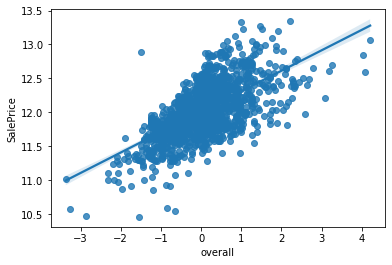

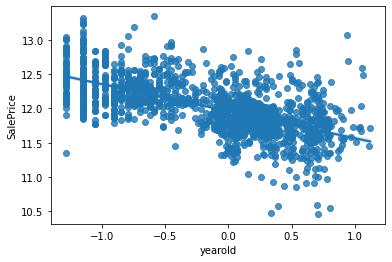

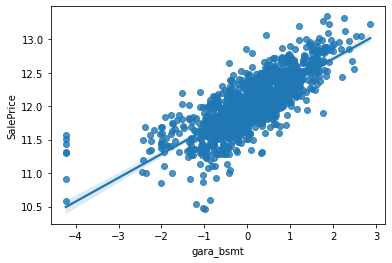

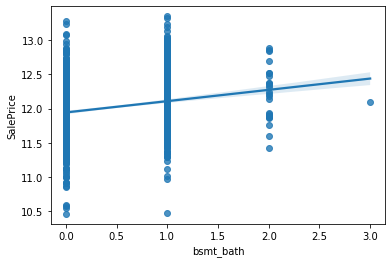

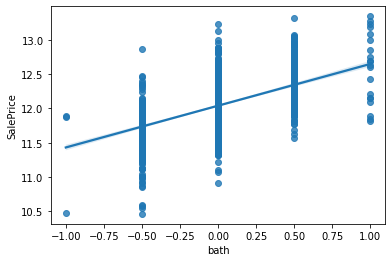

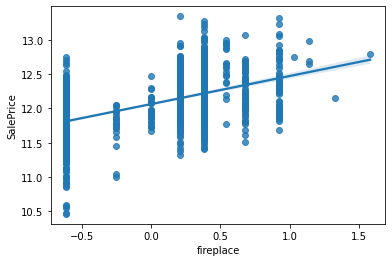

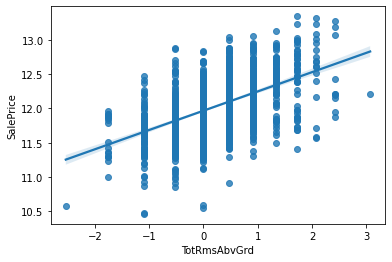

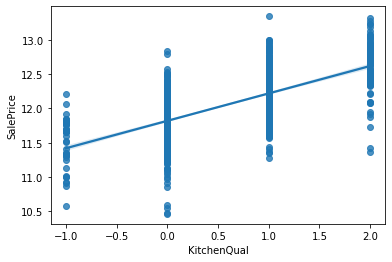

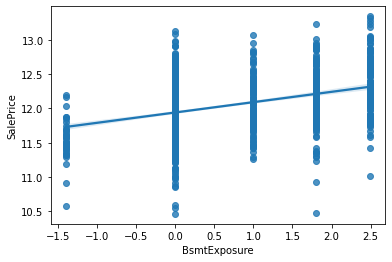

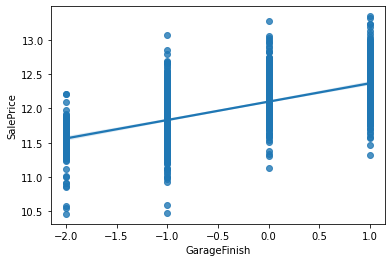

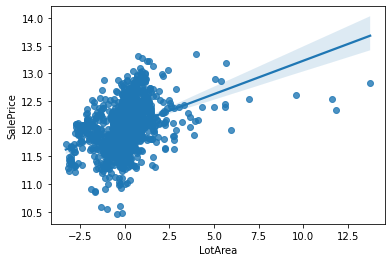

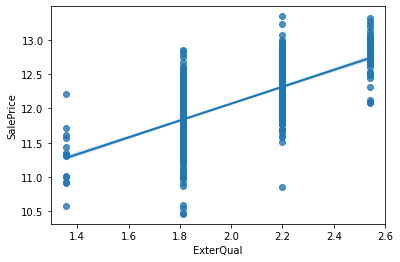

In [10]:
##apply robustscaler
#Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
train[numeric_feature] = trans.fit_transform(train[numeric_feature])
test[numeric_feature] = trans.fit_transform(test[numeric_feature])       
for h in skew_feat:
    sns.regplot(x = h, y = 'SalePrice' , data = train)
    plt.show()

In [11]:
#dummies: MSZoning, Neighborhood, SaleCondition,SaleType
dummy=['MSSubClass','MSZoning','Neighborhood','SaleCondition','SaleType','LotShape','LandContour',
      'Utilities','LotConfig','LandSlope','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl',
      'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional',
       'Fence','GarageType','date','PavedDrive']
###train_data
train_dummies = pd.get_dummies(train[dummy])
train_numer=train[numeric_feature]
train_data = pd.concat([train_numer, train_dummies],axis=1)
###test_data
test_dummies = pd.get_dummies(test[dummy])
test_numer=test[numeric_feature]
test_data = pd.concat([test_numer, test_dummies],axis=1)
###robust_scaler.-Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
train_data[numeric_feature] = trans.fit_transform(train_data[numeric_feature])
test_data[numeric_feature] = trans.fit_transform(test_data[numeric_feature])       

In [12]:
one_hot_encoded_training_predictors = pd.get_dummies(train_data)
one_hot_encoded_test_predictors = pd.get_dummies(test_data)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [13]:
###remove categorical features which are only in train data
####
final_train=final_train.drop(['HouseStyle_2.5Fin'], axis=1)
final_test=final_test.drop(['HouseStyle_2.5Fin'], axis=1)
####
final_train=final_train.drop(['RoofMatl_Membran'], axis=1)
final_test=final_test.drop(['RoofMatl_Membran'], axis=1)
###
final_train=final_train.drop(['RoofMatl_Metal'], axis=1)
final_test=final_test.drop(['RoofMatl_Metal'], axis=1)
#####
final_train=final_train.drop(['RoofMatl_Roll'], axis=1)
final_test=final_test.drop(['RoofMatl_Roll'], axis=1)
#####
final_train=final_train.drop(['Exterior1st_ImStucc'], axis=1)
final_test=final_test.drop(['Exterior1st_ImStucc'], axis=1)
#####
final_train=final_train.drop(['Exterior1st_Stone'], axis=1)
final_test=final_test.drop(['Exterior1st_Stone'], axis=1)
####
final_train=final_train.drop(['Utilities_NoSeWa'], axis=1)
final_test=final_test.drop(['Utilities_NoSeWa'], axis=1)
#####
final_train=final_train.drop(['Exterior2nd_Other'], axis=1)
final_test=final_test.drop(['Exterior2nd_Other'], axis=1)
####
final_train=final_train.drop(['Heating_Floor'], axis=1)
final_test=final_test.drop(['Heating_Floor'], axis=1)
####
final_train=final_train.drop(['Heating_OthW'], axis=1)
final_test=final_test.drop(['Heating_OthW'], axis=1)
####
final_train=final_train.drop(['Electrical_Mix'], axis=1)
final_test=final_test.drop(['Electrical_Mix'], axis=1)
a=final_test.isnull().sum()
final_train.shape

(1456, 252)

In [14]:
####check train misssing data
a=final_train.isna().sum()
b=final_train.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h])) 

Another way to categorize outliers is by using standardized residuals from linear models. Standardized residuals is can easily identify an abnormal residuals as they are standardized and we can observe the residuals in standard deviation units. Anything larger than 3 standard deviations are usually considered outliers.
ref.- https://www.kaggle.com/code/limyenwee/stacked-ensemble-models-top-3-on-leaderboard/notebook

About 93.77% of variation in the Sale Price can be explained by the model.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


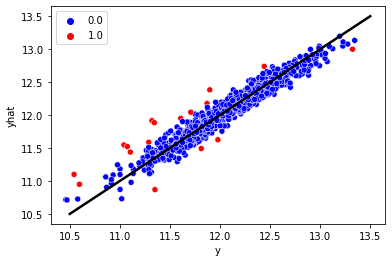

In [15]:
##split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
X=final_train
y=train['SalePrice']

###identify and remove more outliers with standard linear regression 
linear = LinearRegression()
linear.fit(X, y)
y_pred = linear.predict(X)
####
residuals = y - y_pred
r2 = r2_score(y, y_pred)
y_vs_yhat_df = pd.DataFrame(zip(y.values,y_pred,residuals),columns=['y','yhat','residuals'],index=X.index)
print("About " + str(round(r2 * 100,2)) + "% of variation in the Sale Price can be explained by the model.")
##
standard_residuals = (residuals - residuals.mean()) / residuals.std()
outliers = X[abs(standard_residuals) > 3]
y_vs_yhat_df.loc[y_vs_yhat_df.index.isin(outliers.index),'Outlier'] = 1
y_vs_yhat_df.loc[y_vs_yhat_df['Outlier'] != 1 ,'Outlier'] = 0
####
sns.scatterplot(data = y_vs_yhat_df, x='y', y='yhat',hue ='Outlier', palette = ['blue','red'])
sns.lineplot(np.linspace(10.5,13.5),np.linspace(10.5,13.5), color='black', linewidth=2.5)
plt.show()
###

In [16]:
###remove outliers
X['Outlier']=y_vs_yhat_df['Outlier']
X = X[X.Outlier < 1]
X.reset_index(drop=True, inplace=True)
X=X.drop(['Outlier'], axis=1)
train['Outlier']=y_vs_yhat_df['Outlier']
train = train[train.Outlier < 1]
train.reset_index(drop=True, inplace=True)
y=train['SalePrice']
X.shape

(1439, 252)

In [17]:
###split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [18]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from numpy import nan
import catboost as cb
from sklearn.linear_model import Ridge, HuberRegressor, LinearRegression
from sklearn.svm import SVR

###https://www.kaggle.com/code/limyenwee/stacked-ensemble-models-top-3-on-leaderboard/notebook

ridgemodel = Ridge(alpha=18)

elasticmodel = ElasticNet(alpha=0.000400, l1_ratio=0.760000)


xgbmodel = XGBRegressor( colsample_bylevel=1, colsample_bytree=0.5, 
         learning_rate=0.01,
             max_depth=3, min_child_weight=1, n_estimators=10000, n_jobs=2,
             num_parallel_tree=1, random_state=0, subsample=0.65,verbosity=None)

svrmodel = SVR(C=8, epsilon=0.00005, gamma=0.0008)

hubermodel = HuberRegressor(alpha=30,epsilon=3,fit_intercept=True,max_iter=2000)


cbmodel = cb.CatBoostRegressor(loss_function='RMSE',colsample_bylevel=0.3, depth=2, \
          l2_leaf_reg=20, learning_rate=0.005, n_estimators=15000, subsample=0.3,verbose=False)

###ref.- https://medium.com/analytics-vidhya/ensemble-methods-bagging-boosting-and-stacking-28d006708731

stackmodel = StackingCVRegressor(regressors=(ridgemodel, xgbmodel, elasticmodel,svrmodel,hubermodel)
                                 ,meta_regressor=cbmodel, use_features_in_secondary=True,random_state=0)

In [19]:
####fit stackmodel with all train data and predict price with test data
stackmodel.fit(np.array(X), np.array(y))

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x7f905f418f50>,
                    random_state=0,
                    regressors=(Ridge(alpha=18),
                                XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=None,
                                             colsample_bytree=0.5,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=None,
                                             gpu_id=None, grow...
                                             max_delta_step=None, max_depth=3,
                                             max_leaves=None,
                                             min_child_w

In [20]:
#test_pred
test_pred = stackmodel.predict(final_test)
###inverse of log1p
test_pred=np.expm1(test_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [21]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': test_pred})
output.to_csv('submission.csv', index=False)
output

,Id,SalePrice
0,1461,129619.120546
1,1462,166664.073220
2,1463,188069.356732
3,1464,205733.199498
4,1465,186364.209812
...,...,...
1454,2915,100402.823119
1455,2916,84691.380754
1456,2917,156538.898942
1457,2918,143639.894832
